<a href="https://colab.research.google.com/github/DDursun/AppliedML-CSCI6767/blob/main/LinearRegressionwPolynomials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Token might expire, please get the link to the raw file from the repository - https://github.com/DDursun/AppliedML-CSCI6767/blob/main/Real%20estate.csv

url = "https://raw.githubusercontent.com/amirpashayev/Applied-ML---Project-1/refs/heads/main/Real%20estate.csv?token=GHSAT0AAAAAACUKBOLBKEJDHBVHT5JEC5HKZ5A5OYA"
data = pd.read_csv(url)


In [3]:


data.columns = [col.split(" ", 1)[-1] if " " in col else col for col in data.columns]
data.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.isnull().sum()

,0
No,0
transaction date,0
house age,0
distance to the nearest MRT station,0
number of convenience stores,0
latitude,0
longitude,0
house price of unit area,0


In [5]:
# Select predictor (X) and response variable (Y)
X = data[['house age']]
Y = data['house price of unit area']

In [6]:
# 1a. Fit a Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Extract coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Predictions and Residual Sum of Squares (RSS)
predictions = model.predict(X)
residuals = Y - predictions
RSS = np.sum(residuals**2)

In [7]:
# 1b. Assessing accuracy using statsmodels
X_with_const = sm.add_constant(X)
stats_model = sm.OLS(Y, X_with_const).fit()

In [8]:
# 1c. Extract standard errors, confidence intervals, t-statistics, and p-values
se = stats_model.bse
conf_intervals = stats_model.conf_int(alpha=0.05)
t_values = stats_model.tvalues
p_values = stats_model.pvalues

In [9]:
# 1d. Model accuracy metrics: RSE, R-squared, and correlation (r)
RSE = np.sqrt(RSS / (len(Y) - 2))  # Residual Standard Error
R_squared = stats_model.rsquared
correlation = np.corrcoef(X['house age'], Y)[0, 1]

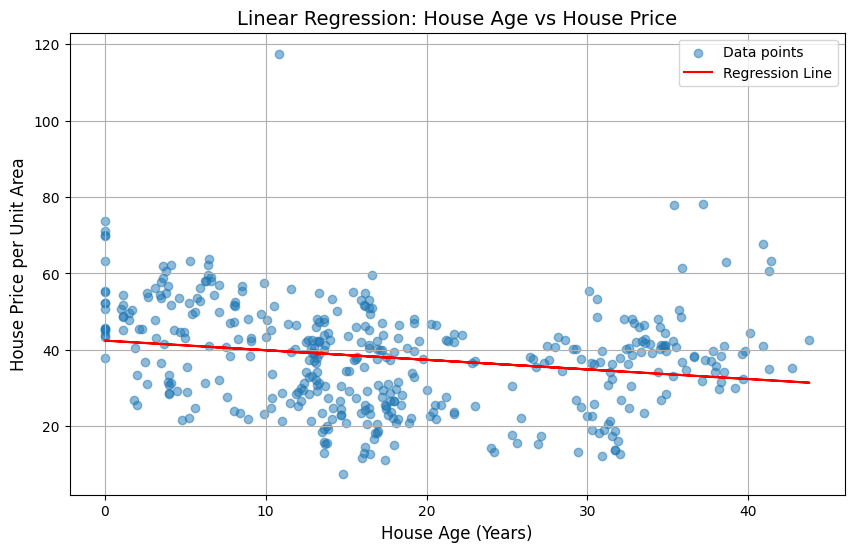

In [10]:
# 1e. Visualization: Scatterplot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label="Data points")
plt.plot(X, predictions, color='red', label="Regression Line")
plt.title("Linear Regression: House Age vs House Price", fontsize=14)
plt.xlabel("House Age (Years)", fontsize=12)
plt.ylabel("House Price per Unit Area", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Output results
print("\n**Linear Regression Results:**")
print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.4f}")
print(f"Residual Sum of Squares (RSS): {RSS:.2f}")

print("\n**Standard Errors:**")
print(se)

print("\n**Confidence Intervals:**")
print(conf_intervals)

print("\n**T-statistics:**")
print(t_values)

print("\n**P-values:**")
print(p_values)

print("\n**Model Assessment:**")
print(f"Residual Standard Error (RSE): {RSE:.2f}")
print(f"R-squared: {R_squared:.3f}")
print(f"Correlation (r): {correlation:.3f}")


**Linear Regression Results:**
Intercept: 42.43
Slope: -0.2515
Residual Sum of Squares (RSS): 73071.20

**Standard Errors:**
const        1.210977
house age    0.057522
dtype: float64

**Confidence Intervals:**
                   0          1
const      40.054233  44.815161
house age  -0.364561  -0.138416

**T-statistics:**
const        35.041711
house age    -4.372069
dtype: float64

**P-values:**
const        1.180262e-125
house age     1.560426e-05
dtype: float64

**Model Assessment:**
Residual Standard Error (RSE): 13.32
R-squared: 0.044
Correlation (r): -0.211


## Part 2.

## 2.a

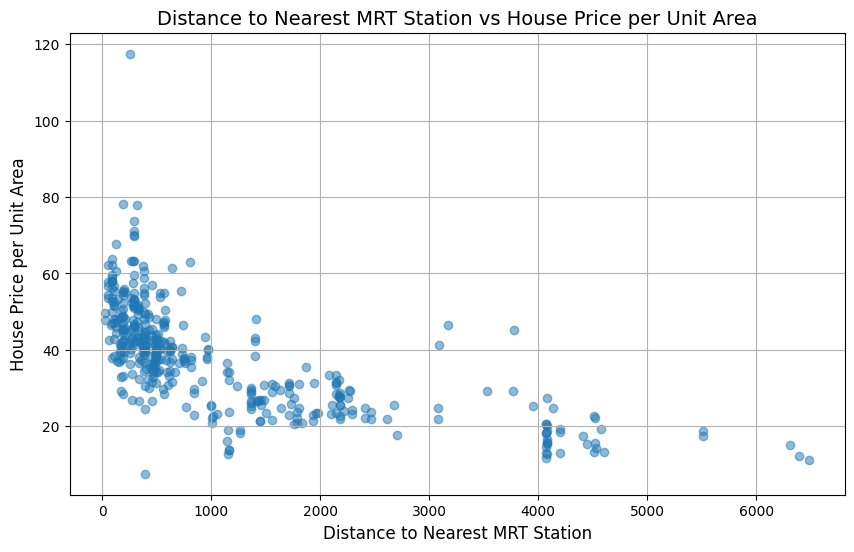

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data['distance to the nearest MRT station'], y = data['house price of unit area'], alpha=0.5)
plt.title("Distance to Nearest MRT Station vs House Price per Unit Area", fontsize=14)
plt.xlabel("Distance to Nearest MRT Station", fontsize=12)
plt.ylabel("House Price per Unit Area", fontsize=12)
plt.grid(True)
plt.show()

There is a clear reverse relationship between how close the house is to the nearest metro station. So at least one of predictors are useful. Let's check the rest of them.

**This can also be verified using f-statistics. It is done together with task c and d.**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# All columns except target
X = data[['distance to the nearest MRT station']]
# Target
Y = data["house price of unit area"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
r2 = r2_score(Y_train, Y_pred)

# Predictions on training data
Y_train_pred = model.predict(X_train)

# Calculate TSS and RSS
TSS = np.sum((Y_train - np.mean(Y_train))**2)
RSS = np.sum((Y_train - Y_train_pred)**2)

# Get number of predictors (p) and observations (n)
p = X_train.shape[1]
n = X_train.shape[0]

# Compute F-statistic
F_stat = ((TSS - RSS) / p) / (RSS / (n - p - 1))

print(f"F-statistic: {F_stat}")
print("")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


F-statistic: 249.87979468988956

R² Score: 0.4317
RMSE: 10.3392


In [29]:
from scipy.stats import f

p = X_train.shape[1]  # Number of predictors
n = X_train.shape[0]  # Number of observations
df1 = p
df2 = n - p - 1

# Critical value for F-distribution at 95% confidence level
F_critical = f.ppf(0.95, df1, df2)

# Compare F-statistic with critical value
if F_stat > F_critical:
    print(f"F-statistic {F_stat:.2f} > Critical value {F_critical:.2f}: Reject H0 (At least one predictor is useful)")
else:
    print(f"F-statistic {F_stat:.2f} <= Critical value {F_critical:.2f}: Fail to reject H0 (Predictors are not useful)")


F-statistic 249.88 > Critical value 3.87: Reject H0 (At least one predictor is useful)


## 2.*b*

Do all the predictors help to explain Y, or is only a subset of the predictors useful?

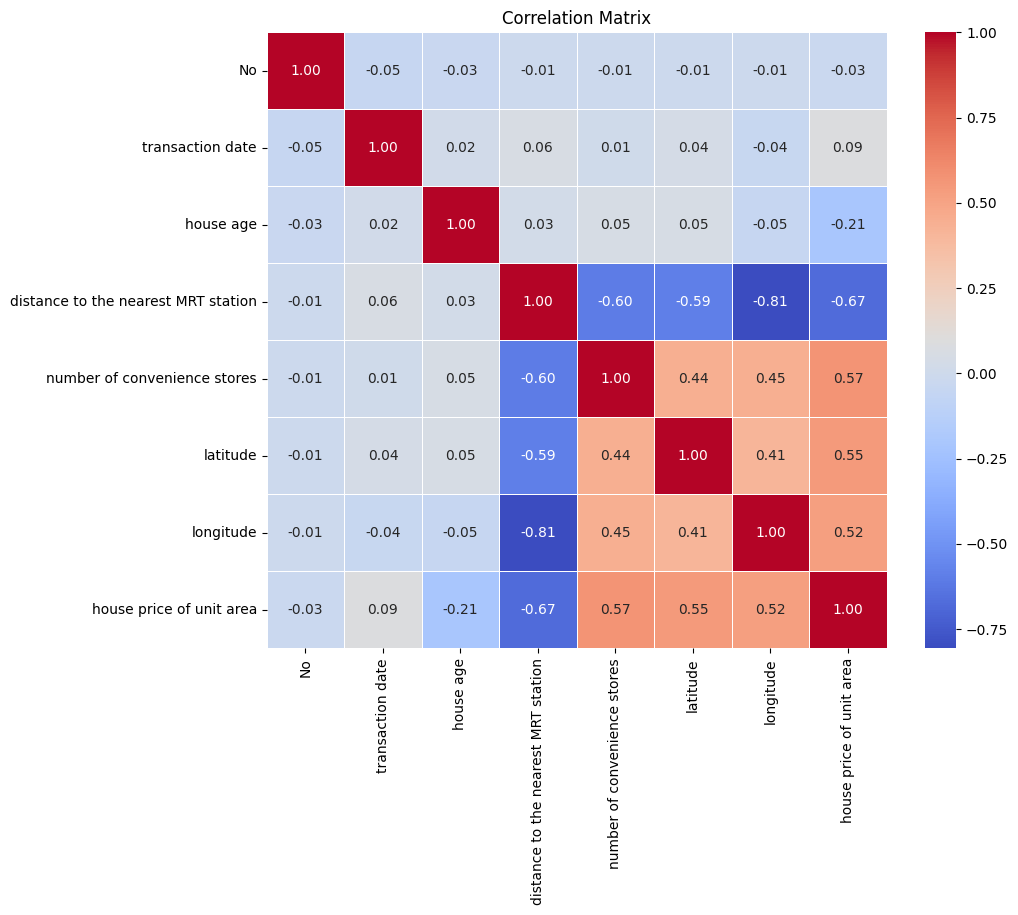

In [13]:
import seaborn as sns

# Compute correlation matrix
correlation = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Matrix")
plt.show()


The correlation plot shows that some of the features are correlating with our target variable. However, column "No" and "transaction date" are not useful predictors. Therefore, we can drop that columns before applying Multiple Regression.

In [14]:
data = data.drop(columns=["No", "transaction date"])
data.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## 2.c and d

To check the fit, let's refit the model with all remaining *columns*

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# All columns except target
X = data.drop(columns=["house price of unit area"])
# Target
Y = data["house price of unit area"]

# Initialize and fit the model
model = LinearRegression()
model.fit(X, Y)

# Extract coefficients
intercept = model.intercept_
coefficients = model.coef_

print("If user gives us values, we should use following coefficients to predict the Y:")
print()
print(f"Intercept: {intercept}")
for col, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {col}: {coef}")

print("The accuracy of fit is: ")

# Model performance on training data
r_squared = model.score(X, Y)
print("")
print(f"R² Score: {r_squared:.4f}")

If user gives us values, we should use following coefficients to predict the Y:

Intercept: -4945.595113742857
Coefficient for house age: -0.2689168327771949
Coefficient for distance to the nearest MRT station: -0.004259088984149821
Coefficient for number of convenience stores: 1.1630204773244661
Coefficient for latitude: 237.76719097741721
Coefficient for longitude: -7.805452732226843
The accuracy of fit is: 

R² Score: 0.5712


### How accurate is our prediction?

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# All columns except target
X = data.drop(columns=["house price of unit area"])
# Target
Y = data["house price of unit area"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

# Predictions on training data
Y_train_pred = model.predict(X_train)

# Calculate TSS and RSS
TSS = np.sum((Y_train - np.mean(Y_train))**2)
RSS = np.sum((Y_train - Y_train_pred)**2)


intercept = model.intercept_
coefficients = model.coef_


print("If user gives us values, we should use following coefficients to predict the Y:")
print()
print(f"Intercept: {intercept}")
for col, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {col}: {coef}")

print("The accuracy of fit is: ")


# Get number of predictors (p) and observations (n)
p = X_train.shape[1]
n = X_train.shape[0]

# Compute F-statistic
F_stat = ((TSS - RSS) / p) / (RSS / (n - p - 1))

#print(f"F-statistic: {F_stat}")
print("")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


If user gives us values, we should use following coefficients to predict the Y:

Intercept: -1606.2488138164927
Coefficient for house age: -0.2494361700211666
Coefficient for distance to the nearest MRT station: -0.0047055141121170796
Coefficient for number of convenience stores: 1.1149714112745959
Coefficient for latitude: 235.22780205476866
Coefficient for longitude: -34.754362240219145
The accuracy of fit is: 

R² Score: 0.7007
RMSE: 6.7398


Let's check the F-statistic with regards to critical value:

In [32]:
from scipy.stats import f

p = X_train.shape[1]  # Number of predictors
n = X_train.shape[0]  # Number of observations
df1 = p
df2 = n - p - 1

# Critical value for F-distribution at 95% confidence level
F_critical = f.ppf(0.95, df1, df2)

# Compare F-statistic with critical value
if F_stat > F_critical:
    print(f"F-statistic {F_stat:.2f} > Critical value {F_critical:.2f}: Reject H0 (Predictors are useful)")
else:
    print(f"F-statistic {F_stat:.2f} <= Critical value {F_critical:.2f}: Fail to reject H0 (Predictors are not useful)")


F-statistic 78.11 > Critical value 2.24: Reject H0 (Predictors are useful)


## 2.e Interactions between qualitative and quantitative variables

 Our dataset does not have caregorical features so we will construct them:



In [17]:
sorted_data = data.copy()

# Sort by Latitude (North to South) and create latitude bins
sorted_data = sorted_data.sort_values(by=["latitude"], ascending=[False]).reset_index(drop=True)
lat_bins = pd.cut(sorted_data.index, bins=3, labels=["North", "Center", "South"])
sorted_data["Lat Cluster"] = lat_bins.astype(str)

# Sort by Longitude (West to East) and create longitude bins
sorted_data = sorted_data.sort_values(by=["longitude"], ascending=[True]).reset_index(drop=True)
long_bins = pd.cut(sorted_data.index, bins=3, labels=["West", "Central", "East"])
sorted_data["Long Cluster"] = long_bins.astype(str)

# Merge latitude and longitude clusters into Location Cluster
sorted_data["Location Cluster"] = sorted_data["Lat Cluster"] + " - " + sorted_data["Long Cluster"]


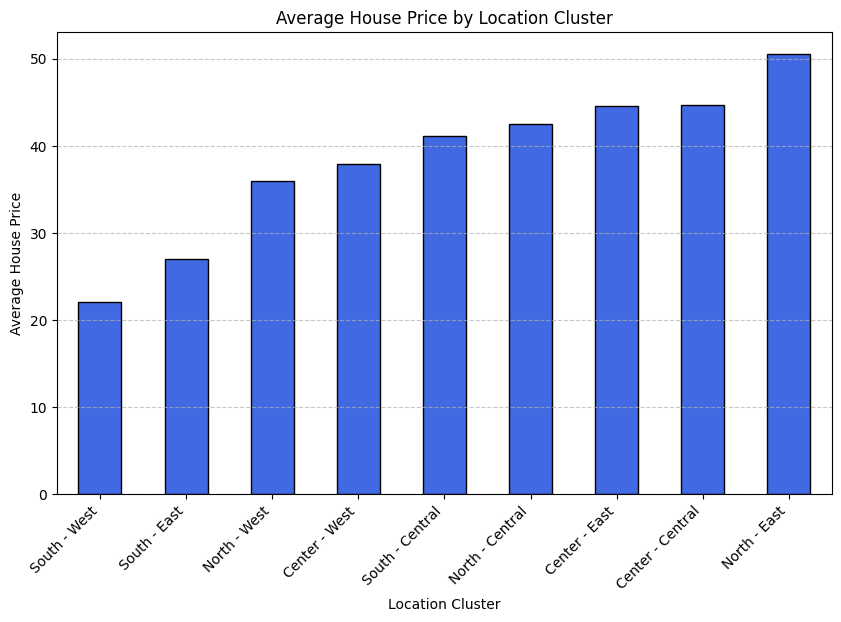

In [18]:
# Compute average house price per location cluster
location_price_avg = sorted_data.groupby("Location Cluster")["house price of unit area"].mean()

# Plot bar chart for average prices in each region
plt.figure(figsize=(10, 6))
location_price_avg.sort_values().plot(kind="bar", color="royalblue", edgecolor="black")

plt.xlabel("Location Cluster")
plt.ylabel("Average House Price")
plt.title("Average House Price by Location Cluster")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show bar chart
plt.show()

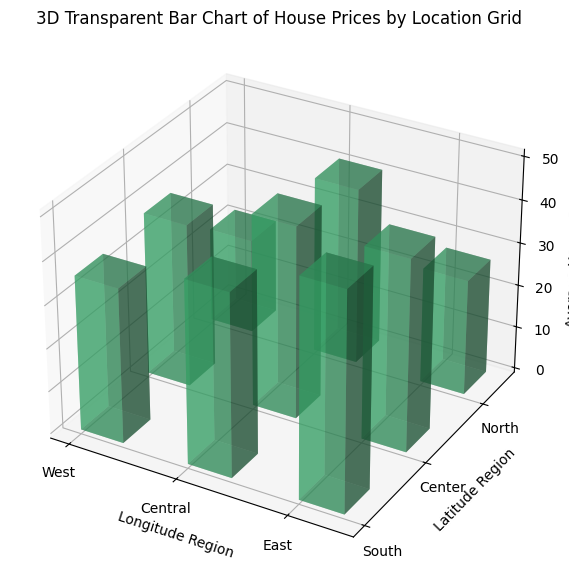

In [19]:
# Compute average house price for each location cluster
location_price_avg = sorted_data.groupby("Location Cluster")["house price of unit area"].mean().reset_index()

# Map categorical labels to numerical positions
lat_map = {"North": 0, "Center": 1, "South": 2}
long_map = {"West": 0, "Central": 1, "East": 2}
location_price_avg["Lat Index"] = location_price_avg["Location Cluster"].apply(lambda x: lat_map[x.split(" - ")[0]])
location_price_avg["Long Index"] = location_price_avg["Location Cluster"].apply(lambda x: long_map[x.split(" - ")[1]])



# Plot 3D bars with transparency
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.bar3d(
    location_price_avg["Long Index"],
    location_price_avg["Lat Index"],
    np.zeros_like(location_price_avg["house price of unit area"]),
    dx=0.4, dy=0.4, dz=location_price_avg["house price of unit area"],
    color="mediumseagreen", alpha=0.53 )

ax.set_xlabel("Longitude Region")
ax.set_ylabel("Latitude Region")
ax.set_zlabel("Average House Price")
ax.set_title("3D Transparent Bar Chart of House Prices by Location Grid")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["West", "Central", "East"])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(["South", "Center", "North"])  # North now at the back
plt.show()


## 2.f Non-linear predictors

We can introduce non-lineaarity with 2 ways, by feature engineering (domain knowledge) or increasing the number of features by polynomials.

In [20]:
from sklearn.linear_model import LinearRegression

# All columns except target
X = data.drop(columns=["house price of unit area"])

# Add interaction term: Latitude × Longitude
X["Lat_Long"] = X["latitude"] * X["longitude"]

# Adding log tranform (due to shape)
X["distance to the nearest MRT station	"] = np.log1p(X["distance to the nearest MRT station"])
X = X.drop(columns=["latitude", "longitude"])

# Target
Y = data["house price of unit area"]

# Initialize and fit the model
nonlinear_model_1 = LinearRegression()
nonlinear_model_1.fit(X, Y)

# Extract coefficients
intercept = nonlinear_model_1.intercept_
coefficients = nonlinear_model_1.coef_

print(f"Intercept: {intercept}")
for col, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {col}: {coef}")

r_squared = nonlinear_model_1.score(X, Y)
print(f"R² Score: {r_squared:.4f}")



Intercept: -7901.105569330005
Coefficient for house age: -0.22844094895487008
Coefficient for distance to the nearest MRT station: 0.0013750078922352207
Coefficient for number of convenience stores: 0.4214063774048725
Coefficient for Lat_Long: 2.631590249135379
Coefficient for distance to the nearest MRT station	: -7.166681559891725
R² Score: 0.6367


Let's try polynomials. Including 2 degree polynomials result in new feature set => \begin{bmatrix} X_1, X_2, X_1^2, X_2^2, X_1 \cdot X_2 \end{bmatrix}


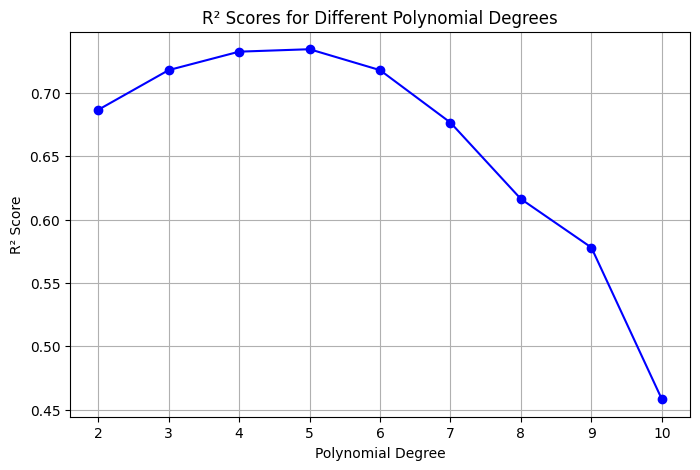

In [50]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
r2_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    nonlinear_model = LinearRegression()
    nonlinear_model.fit(X_poly, Y)

    r2_poly = nonlinear_model.score(X_poly, Y)
    r2_scores.append(r2_poly)

plt.figure(figsize=(8, 5))
plt.plot(degrees, r2_scores, marker='o', linestyle='-', color='b')
plt.title("R² Scores for Different Polynomial Degrees")
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.grid(True)
plt.xticks(degrees)
plt.show()


As you can see we can capture variation in data better with giher degree polynomial features.